In [ ]:
# default_exp mining.unsupervised.eval

# Evaluating Neural Unsupervised Approaches for SE Traceability

> This module is dedicated to evaluate word2vec/doc2vec or any neural unsupervised approaches on traceability datasets:
>
> Author: @danaderp April 2020

In [ ]:
# export
# Imports
import numpy as np
import gensim
import pandas as pd
from itertools import product 
from random import sample 
import functools 
import os

In [ ]:
from datetime import datetime
import seaborn as sns

In [ ]:
#export
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
#hide
#!pip install pyemd
!pip install seaborn

     |████████████████████████████████| 215 kB 3.7 MB/s eta 0:00:01


In [ ]:
#TODO create a class for loading the model
new_model = gensim.models.Word2Vec.load("test_data/models/word2vec_libest.model")

2020-04-24 15:18:34,738 : INFO : loading Word2Vec object from test_data/models/word2vec_libest.model
2020-04-24 15:18:34,851 : INFO : loading wv recursively from test_data/models/word2vec_libest.model.wv.* with mmap=None
2020-04-24 15:18:34,852 : INFO : setting ignored attribute vectors_norm to None
2020-04-24 15:18:34,852 : INFO : loading vocabulary recursively from test_data/models/word2vec_libest.model.vocabulary.* with mmap=None
2020-04-24 15:18:34,853 : INFO : loading trainables recursively from test_data/models/word2vec_libest.model.trainables.* with mmap=None
2020-04-24 15:18:34,853 : INFO : setting ignored attribute cum_table to None
2020-04-24 15:18:34,854 : INFO : loaded test_data/models/word2vec_libest.model


In [ ]:
new_model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.

2020-04-24 15:18:36,559 : INFO : precomputing L2-norms of word weight vectors


In [ ]:
source_path = '/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-req].csv'
target_path = '/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-tc].csv'
df_source = pd.read_csv(source_path, names=['ids', 'text'], header=None, sep=' ')
df_source.head()

,ids,text
0,test_data/LibEST_semeru_format/requirements/RQ...,requir http uri control est server must suppor...
1,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat respons request...
2,test_data/LibEST_semeru_format/requirements/RQ...,requir http base client authent est server may...
3,test_data/LibEST_semeru_format/requirements/RQ...,requir csr attribut request est client request...
4,test_data/LibEST_semeru_format/requirements/RQ...,requir server side key generat est client may ...


In [ ]:
#Loading Artifacts
artifacts = pd.read_csv('/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-all].csv')
texts = [doc.split() for doc in list(artifacts['0'])]

In [ ]:
df_source['ids'][0]

'test_data/LibEST_semeru_format/requirements/RQ17-pre.txt'

In [ ]:
df_target = pd.read_csv(target_path, names=['ids', 'text'], header=None, sep=' ')
df_target.head()

,ids,text
0,test_data/LibEST_semeru_format/test/us903.c,unit test user stori server simpl enrol august...
1,test_data/LibEST_semeru_format/test/us3496.c,unit test uri path segment extens support marc...
2,test_data/LibEST_semeru_format/test/us899.c,unit test user stori client simpl enrol septem...
3,test_data/LibEST_semeru_format/test/us4020.c,unit test user stori unit test client proxi mo...
4,test_data/LibEST_semeru_format/test/us897.c,unit test user stori client cacert june copyri...


In [ ]:
idss = df_source['ids'][0] #Selecting an ID
idss = df_source['ids'] == idss #Search for an specific ID

In [ ]:
list(df_source[idss]['text'])[0].split() #Retrieving text and splitting

['requir',
 'http',
 'uri',
 'control',
 'est',
 'server',
 'must',
 'support',
 'use',
 'path',
 'prefix',
 'well',
 'known',
 'defin',
 'rfc',
 'regist',
 'name',
 'est',
 'thus',
 'valid',
 'est',
 'server',
 'uri',
 'path',
 'begin',
 'https',
 'www',
 'exampl',
 'com',
 'well',
 'known',
 'est',
 'est',
 'oper',
 'indic',
 'path',
 'suffix',
 'indic',
 'intend',
 'oper',
 'oper',
 'correspond',
 'uri',
 'oper',
 'oper',
 'path',
 'detail',
 'distribut',
 'cacert',
 'section',
 'certif',
 'must',
 'enrol',
 'simpleenrol',
 'section',
 'client',
 'must',
 'enrol',
 'simplereenrol',
 'section',
 'client',
 'must',
 'full',
 'cmc',
 'option',
 'fullcmc',
 'section',
 'server',
 'side',
 'key',
 'serverkeygen',
 'section',
 'generat',
 'option',
 'csr',
 'attribut',
 'csrattr',
 'section',
 'option',
 'figur',
 'oper',
 'path',
 'figur',
 'append',
 'path',
 'prefix',
 'form',
 'uri',
 'use',
 'http',
 'get',
 'post',
 'perform',
 'desir',
 'est',
 'oper',
 'exampl',
 'valid',
 'uri',


In [ ]:
source = [os.path.basename(elem) for elem in list( df_source['ids'] )]
target = [os.path.basename(elem) for elem in list( df_target['ids'] )]

In [ ]:
len(target)

21

In [ ]:
len(set(target))

21

In [ ]:
links = list( product( source , target ) )

In [ ]:
links

[('RQ17-pre.txt', 'us903.c'),
 ('RQ17-pre.txt', 'us3496.c'),
 ('RQ17-pre.txt', 'us899.c'),
 ('RQ17-pre.txt', 'us4020.c'),
 ('RQ17-pre.txt', 'us897.c'),
 ('RQ17-pre.txt', 'us1060.c'),
 ('RQ17-pre.txt', 'us900.c'),
 ('RQ17-pre.txt', 'us896.c'),
 ('RQ17-pre.txt', 'us894.c'),
 ('RQ17-pre.txt', 'us1005.c'),
 ('RQ17-pre.txt', 'us898.c'),
 ('RQ17-pre.txt', 'us3512.c'),
 ('RQ17-pre.txt', 'us1883.c'),
 ('RQ17-pre.txt', 'us748.c'),
 ('RQ17-pre.txt', 'us3612.c'),
 ('RQ17-pre.txt', 'us901.c'),
 ('RQ17-pre.txt', 'us1864.c'),
 ('RQ17-pre.txt', 'us1159.c'),
 ('RQ17-pre.txt', 'us2174.c'),
 ('RQ17-pre.txt', 'us893.c'),
 ('RQ17-pre.txt', 'us895.c'),
 ('RQ46-pre.txt', 'us903.c'),
 ('RQ46-pre.txt', 'us3496.c'),
 ('RQ46-pre.txt', 'us899.c'),
 ('RQ46-pre.txt', 'us4020.c'),
 ('RQ46-pre.txt', 'us897.c'),
 ('RQ46-pre.txt', 'us1060.c'),
 ('RQ46-pre.txt', 'us900.c'),
 ('RQ46-pre.txt', 'us896.c'),
 ('RQ46-pre.txt', 'us894.c'),
 ('RQ46-pre.txt', 'us1005.c'),
 ('RQ46-pre.txt', 'us898.c'),
 ('RQ46-pre.txt', 'us3512.

In [ ]:
#export
def samplingLinks(df_source, df_target, sampling = False, samples = 10):
    source = [os.path.basename(elem) for elem in list( df_source['ids'] )]
    target = [os.path.basename(elem) for elem in list( df_target['ids'] )]
    
    if sampling:
        links = sample( list( product( source , target ) ), samples)
    else:
        links = list( product( source , target ))
                     
    return links

In [ ]:
links = samplingLinks(df_source,df_target,sampling=True)
links

[('RQ55-pre.txt', 'us1005.c'),
 ('RQ7-pre.txt', 'us3512.c'),
 ('RQ20-pre.txt', 'us894.c'),
 ('RQ28-pre.txt', 'us895.c'),
 ('RQ38-pre.txt', 'us893.c'),
 ('RQ41-pre.txt', 'us3612.c'),
 ('RQ56-pre.txt', 'us897.c'),
 ('RQ18-pre.txt', 'us897.c'),
 ('RQ47-pre.txt', 'us2174.c'),
 ('RQ31-pre.txt', 'us894.c')]

In [ ]:
print(len(links), df_source.shape, df_target.shape)

10 (52, 2) (21, 2)


In [ ]:
#export
'''If the artifacts have very similar content, therefore the WMD should be low'''
def computeDistanceMetric( df_source , df_target, link, metric="WMD" ):
    #TODO Model should be generalized
    splittedListA = list(df_source[df_source['ids'].str.contains(link[0])]['text'])[0].split()
    splittedListB = list(df_target[df_target['ids'].str.contains(link[1])]['text'])[0].split()
    
    if metric == "WMD":
        dist = new_model.wv.wmdistance(splittedListA, splittedListB)
    else:
        dist = None
    return dist

In [ ]:
temp = [(link[0], link[1], computeDistanceMetric( df_source , df_target, link ) ) for link in links]

2020-04-24 15:42:54,509 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 15:42:54,514 : INFO : built Dictionary(856 unique tokens: ['0ze', '1zi', '2qd', '2w8yt', '3w0tn2ufuxdw']...) from 2 documents (total 2097 corpus positions)
2020-04-24 15:43:20,255 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 15:43:20,257 : INFO : built Dictionary(671 unique tokens: ['authent', 'certif', 'cipher', 'client', 'est']...) from 2 documents (total 2401 corpus positions)
2020-04-24 15:43:20,753 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 15:43:20,756 : INFO : built Dictionary(556 unique tokens: ['accept', 'access', 'also', 'altern', 'assur']...) from 2 documents (total 2939 corpus positions)
2020-04-24 15:43:22,621 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 15:43:22,623 : INFO : built Dictionary(437 unique tokens: ['accord', 'authent', 'author', 'basi', 'certif']...) from 2 documents (total 2

In [ ]:
print(len(temp))

10


In [ ]:
temp

[('RQ55-pre.txt', 'us1005.c', 0.3989340626731059),
 ('RQ7-pre.txt', 'us3512.c', 0.481922769893365),
 ('RQ20-pre.txt', 'us894.c', 0.4293330980852014),
 ('RQ28-pre.txt', 'us895.c', 0.576343647587364),
 ('RQ38-pre.txt', 'us893.c', 0.3185904887252979),
 ('RQ41-pre.txt', 'us3612.c', 0.48078413245082513),
 ('RQ56-pre.txt', 'us897.c', 0.4735990025061974),
 ('RQ18-pre.txt', 'us897.c', 0.5502366218567635),
 ('RQ47-pre.txt', 'us2174.c', 0.3329914967225463),
 ('RQ31-pre.txt', 'us894.c', 0.42525512255497794)]

In [ ]:
#assert len(links) == 20

In [ ]:
#export
'''Computes a distance metric from the given sets'''
def computeDistanceSWArtifacts(df_source, df_target, sampling = False, samples = 10):
    links_ = samplingLinks(df_source,df_target, sampling, samples)
    docs = [(link[0], link[1], computeDistanceMetric( df_source , df_target, link ) ) for link in links_]
    return docs

In [ ]:
docs = computeDistanceSWArtifacts(df_source, df_target, sampling=False)

2020-04-24 17:02:14,481 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:02:14,487 : INFO : built Dictionary(808 unique tokens: ['"/.', '://', 'absolut', 'addit', 'append']...) from 2 documents (total 2178 corpus positions)
2020-04-24 17:02:22,907 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:02:22,909 : INFO : built Dictionary(477 unique tokens: ['"/.', '://', 'absolut', 'addit', 'append']...) from 2 documents (total 1968 corpus positions)
2020-04-24 17:02:24,917 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:02:24,920 : INFO : built Dictionary(752 unique tokens: ['"/.', '://', 'absolut', 'addit', 'append']...) from 2 documents (total 3784 corpus positions)
2020-04-24 17:02:32,551 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:02:32,554 : INFO : built Dictionary(379 unique tokens: ['"/.', '://', 'absolut', 'addit', 'append']...) from 2 documents (total 2354 corpus pos

2020-04-24 17:04:45,741 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:04:45,744 : INFO : built Dictionary(749 unique tokens: ['accompani', 'addit', 'agre', 'agreement', 'algorithm']...) from 2 documents (total 2803 corpus positions)
2020-04-24 17:04:51,910 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:04:51,914 : INFO : built Dictionary(1206 unique tokens: ['accompani', 'addit', 'agre', 'agreement', 'algorithm']...) from 2 documents (total 3359 corpus positions)
2020-04-24 17:05:21,015 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:05:21,018 : INFO : built Dictionary(833 unique tokens: ['accompani', 'addit', 'agre', 'agreement', 'algorithm']...) from 2 documents (total 2297 corpus positions)
2020-04-24 17:05:31,267 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:05:31,269 : INFO : built Dictionary(380 unique tokens: ['accompani', 'addit', 'agre', 'agreement', 'algori

2020-04-24 17:07:52,614 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:07:52,616 : INFO : built Dictionary(421 unique tokens: ['attribut', 'client', 'csr', 'csrattr', 'desir']...) from 2 documents (total 1733 corpus positions)
2020-04-24 17:07:52,878 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:07:52,881 : INFO : built Dictionary(701 unique tokens: ['attribut', 'client', 'csr', 'csrattr', 'desir']...) from 2 documents (total 3549 corpus positions)
2020-04-24 17:07:53,848 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:07:53,849 : INFO : built Dictionary(320 unique tokens: ['attribut', 'client', 'csr', 'csrattr', 'desir']...) from 2 documents (total 2119 corpus positions)
2020-04-24 17:07:54,067 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:07:54,069 : INFO : built Dictionary(302 unique tokens: ['attribut', 'client', 'csr', 'csrattr', 'desir']...) from 2 documents (t

2020-04-24 17:08:29,133 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:08:29,137 : INFO : built Dictionary(1164 unique tokens: ['addit', 'algorithm', 'appli', 'archiv', 'associ']...) from 2 documents (total 3096 corpus positions)
2020-04-24 17:08:39,485 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:08:39,488 : INFO : built Dictionary(785 unique tokens: ['addit', 'algorithm', 'appli', 'archiv', 'associ']...) from 2 documents (total 2034 corpus positions)
2020-04-24 17:08:44,382 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:08:44,384 : INFO : built Dictionary(330 unique tokens: ['addit', 'algorithm', 'appli', 'archiv', 'associ']...) from 2 documents (total 1249 corpus positions)
2020-04-24 17:08:45,142 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:08:45,145 : INFO : built Dictionary(509 unique tokens: ['addit', 'algorithm', 'appli', 'archiv', 'associ']...) from 2 doc

2020-04-24 17:10:15,304 : INFO : built Dictionary(718 unique tokens: ['accord', 'addit', 'advis', 'allow', 'attribut']...) from 2 documents (total 3594 corpus positions)
2020-04-24 17:10:18,314 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:10:18,316 : INFO : built Dictionary(342 unique tokens: ['accord', 'addit', 'advis', 'allow', 'attribut']...) from 2 documents (total 2164 corpus positions)
2020-04-24 17:10:18,990 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:10:18,992 : INFO : built Dictionary(322 unique tokens: ['accord', 'addit', 'advis', 'allow', 'attribut']...) from 2 documents (total 2670 corpus positions)
2020-04-24 17:10:19,380 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:10:19,382 : INFO : built Dictionary(471 unique tokens: ['accord', 'addit', 'advis', 'allow', 'attribut']...) from 2 documents (total 1654 corpus positions)
2020-04-24 17:10:20,482 : INFO : adding document #0 to Dict

2020-04-24 17:11:43,127 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:11:43,129 : INFO : built Dictionary(349 unique tokens: ['access', 'addit', 'advanc', 'alt', 'applic']...) from 2 documents (total 1279 corpus positions)
2020-04-24 17:11:44,155 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:11:44,157 : INFO : built Dictionary(521 unique tokens: ['access', 'addit', 'advanc', 'alt', 'applic']...) from 2 documents (total 2424 corpus positions)
2020-04-24 17:11:46,742 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:11:46,744 : INFO : built Dictionary(657 unique tokens: ['access', 'addit', 'advanc', 'alt', 'applic']...) from 2 documents (total 1225 corpus positions)
2020-04-24 17:11:51,032 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:11:51,034 : INFO : built Dictionary(456 unique tokens: ['access', 'addit', 'advanc', 'alt', 'applic']...) from 2 documents (total 2336 co

2020-04-24 17:13:38,297 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:13:38,299 : INFO : built Dictionary(329 unique tokens: ['addit', 'also', 'associ', 'authent', 'avail']...) from 2 documents (total 2692 corpus positions)
2020-04-24 17:13:38,759 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:13:38,762 : INFO : built Dictionary(473 unique tokens: ['addit', 'also', 'associ', 'authent', 'avail']...) from 2 documents (total 1676 corpus positions)
2020-04-24 17:13:40,226 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:13:40,228 : INFO : built Dictionary(461 unique tokens: ['addit', 'also', 'associ', 'authent', 'avail']...) from 2 documents (total 2759 corpus positions)
2020-04-24 17:13:41,268 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:13:41,270 : INFO : built Dictionary(338 unique tokens: ['addit', 'also', 'associ', 'authent', 'avail']...) from 2 documents (total 923

2020-04-24 17:14:46,518 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:14:46,520 : INFO : built Dictionary(495 unique tokens: ['abl', 'accept', 'administr', 'authent', 'author']...) from 2 documents (total 2370 corpus positions)
2020-04-24 17:14:48,358 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:14:48,361 : INFO : built Dictionary(635 unique tokens: ['abl', 'accept', 'administr', 'authent', 'author']...) from 2 documents (total 1171 corpus positions)
2020-04-24 17:14:50,946 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:14:50,948 : INFO : built Dictionary(439 unique tokens: ['abl', 'accept', 'administr', 'authent', 'author']...) from 2 documents (total 2282 corpus positions)
2020-04-24 17:14:51,836 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:14:51,840 : INFO : built Dictionary(1136 unique tokens: ['abl', 'accept', 'administr', 'authent', 'author']...) from 2 doc

2020-04-24 17:25:58,366 : INFO : built Dictionary(457 unique tokens: ['accept', 'appli', 'authent', 'author', 'bootstrap']...) from 2 documents (total 1649 corpus positions)
2020-04-24 17:25:59,329 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:25:59,332 : INFO : built Dictionary(445 unique tokens: ['accept', 'appli', 'authent', 'author', 'bootstrap']...) from 2 documents (total 2732 corpus positions)
2020-04-24 17:25:59,967 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:25:59,969 : INFO : built Dictionary(320 unique tokens: ['accept', 'appli', 'authent', 'author', 'bootstrap']...) from 2 documents (total 896 corpus positions)
2020-04-24 17:26:00,445 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:26:00,448 : INFO : built Dictionary(536 unique tokens: ['accept', 'appli', 'authent', 'author', 'bootstrap']...) from 2 documents (total 2886 corpus positions)
2020-04-24 17:26:01,293 : INFO : adding docu

2020-04-24 17:28:47,197 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:28:47,200 : INFO : built Dictionary(490 unique tokens: ['10045', '132', '840', 'access', 'addit']...) from 2 documents (total 2502 corpus positions)
2020-04-24 17:28:49,952 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:28:49,955 : INFO : built Dictionary(1205 unique tokens: ['10045', '132', '840', 'access', 'addit']...) from 2 documents (total 2810 corpus positions)
2020-04-24 17:29:38,148 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:29:38,151 : INFO : built Dictionary(601 unique tokens: ['10045', '132', '840', 'access', 'addit']...) from 2 documents (total 2818 corpus positions)
2020-04-24 17:29:42,874 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:29:42,876 : INFO : built Dictionary(523 unique tokens: ['10045', '132', '840', 'access', 'addit']...) from 2 documents (total 2793 corpus positions)

2020-04-24 17:30:26,622 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:30:26,625 : INFO : built Dictionary(586 unique tokens: ['abl', 'abort', 'accept', 'addit', 'also']...) from 2 documents (total 3079 corpus positions)
2020-04-24 17:30:30,027 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:30:30,029 : INFO : built Dictionary(369 unique tokens: ['abl', 'abort', 'accept', 'addit', 'also']...) from 2 documents (total 1709 corpus positions)
2020-04-24 17:30:31,252 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:30:31,254 : INFO : built Dictionary(457 unique tokens: ['abl', 'abort', 'accept', 'addit', 'also']...) from 2 documents (total 2902 corpus positions)
2020-04-24 17:30:33,116 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:30:33,119 : INFO : built Dictionary(735 unique tokens: ['abl', 'abort', 'accept', 'addit', 'also']...) from 2 documents (total 2635 corpus positio

2020-04-24 17:34:56,172 : INFO : built Dictionary(592 unique tokens: ['abl', 'absent', 'altern', 'applic', 'associ']...) from 2 documents (total 2773 corpus positions)
2020-04-24 17:35:00,515 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:35:00,517 : INFO : built Dictionary(518 unique tokens: ['abl', 'absent', 'altern', 'applic', 'associ']...) from 2 documents (total 2748 corpus positions)
2020-04-24 17:35:03,767 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:35:03,770 : INFO : built Dictionary(783 unique tokens: ['addit', 'administr', 'advis', 'alreadi', 'applic']...) from 2 documents (total 2043 corpus positions)
2020-04-24 17:35:09,909 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:35:09,912 : INFO : built Dictionary(462 unique tokens: ['addit', 'administr', 'advis', 'alreadi', 'applic']...) from 2 documents (total 1833 corpus positions)
2020-04-24 17:35:11,266 : INFO : adding document #0 to Di

2020-04-24 17:36:46,044 : INFO : built Dictionary(345 unique tokens: ['addit', 'allow', 'anchor', 'assum', 'authent']...) from 2 documents (total 1601 corpus positions)
2020-04-24 17:36:46,822 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:36:46,824 : INFO : built Dictionary(437 unique tokens: ['addit', 'allow', 'anchor', 'assum', 'authent']...) from 2 documents (total 2794 corpus positions)
2020-04-24 17:36:48,001 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:36:48,004 : INFO : built Dictionary(712 unique tokens: ['addit', 'allow', 'anchor', 'assum', 'authent']...) from 2 documents (total 2527 corpus positions)
2020-04-24 17:36:52,334 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:36:52,338 : INFO : built Dictionary(1172 unique tokens: ['addit', 'allow', 'anchor', 'assum', 'authent']...) from 2 documents (total 3083 corpus positions)
2020-04-24 17:37:05,335 : INFO : adding document #0 to Diction

2020-04-24 17:38:04,040 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:38:04,042 : INFO : built Dictionary(766 unique tokens: ['applic', 'base', 'binari', 'bodi', 'cert']...) from 2 documents (total 2016 corpus positions)
2020-04-24 17:38:07,159 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:38:07,161 : INFO : built Dictionary(437 unique tokens: ['applic', 'base', 'binari', 'bodi', 'cert']...) from 2 documents (total 1806 corpus positions)
2020-04-24 17:38:07,890 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:38:07,893 : INFO : built Dictionary(716 unique tokens: ['applic', 'base', 'binari', 'bodi', 'cert']...) from 2 documents (total 3622 corpus positions)
2020-04-24 17:38:10,872 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:38:10,874 : INFO : built Dictionary(336 unique tokens: ['applic', 'base', 'binari', 'bodi', 'cert']...) from 2 documents (total 2192 corpus pos

2020-04-24 17:38:47,541 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:38:47,544 : INFO : built Dictionary(1142 unique tokens: ['access', 'afford', 'cmc', 'defin', 'discuss']...) from 2 documents (total 2977 corpus positions)
2020-04-24 17:38:49,974 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:38:49,977 : INFO : built Dictionary(758 unique tokens: ['access', 'afford', 'cmc', 'defin', 'discuss']...) from 2 documents (total 1915 corpus positions)
2020-04-24 17:38:50,983 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:38:50,985 : INFO : built Dictionary(301 unique tokens: ['access', 'afford', 'cmc', 'defin', 'discuss']...) from 2 documents (total 1130 corpus positions)
2020-04-24 17:38:51,185 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:38:51,188 : INFO : built Dictionary(481 unique tokens: ['access', 'afford', 'cmc', 'defin', 'discuss']...) from 2 documents (total 22

2020-04-24 17:39:41,981 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:39:41,984 : INFO : built Dictionary(750 unique tokens: ['accept', 'access', 'allow', 'altern', 'anchor']...) from 2 documents (total 3688 corpus positions)
2020-04-24 17:39:49,541 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:39:49,543 : INFO : built Dictionary(374 unique tokens: ['accept', 'access', 'allow', 'altern', 'anchor']...) from 2 documents (total 2258 corpus positions)
2020-04-24 17:39:51,240 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:39:51,242 : INFO : built Dictionary(353 unique tokens: ['accept', 'access', 'allow', 'altern', 'anchor']...) from 2 documents (total 2764 corpus positions)
2020-04-24 17:39:52,128 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:39:52,130 : INFO : built Dictionary(496 unique tokens: ['accept', 'access', 'allow', 'altern', 'anchor']...) from 2 documents (t

2020-04-24 17:41:35,684 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:41:35,687 : INFO : built Dictionary(764 unique tokens: ['addit', 'also', 'approach', 'authent', 'base']...) from 2 documents (total 1929 corpus positions)
2020-04-24 17:41:37,860 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:41:37,862 : INFO : built Dictionary(308 unique tokens: ['addit', 'also', 'approach', 'authent', 'base']...) from 2 documents (total 1144 corpus positions)
2020-04-24 17:41:38,204 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:41:38,206 : INFO : built Dictionary(483 unique tokens: ['addit', 'also', 'approach', 'authent', 'base']...) from 2 documents (total 2289 corpus positions)
2020-04-24 17:41:39,201 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:41:39,204 : INFO : built Dictionary(622 unique tokens: ['addit', 'also', 'approach', 'authent', 'base']...) from 2 documents (total

2020-04-24 17:43:29,313 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:43:29,315 : INFO : built Dictionary(316 unique tokens: ['agreement', 'asn', 'asymm', 'asymmetr', 'attribut']...) from 2 documents (total 2702 corpus positions)
2020-04-24 17:43:29,715 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:43:29,718 : INFO : built Dictionary(467 unique tokens: ['agreement', 'asn', 'asymm', 'asymmetr', 'attribut']...) from 2 documents (total 1686 corpus positions)
2020-04-24 17:43:30,550 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:43:30,552 : INFO : built Dictionary(447 unique tokens: ['agreement', 'asn', 'asymm', 'asymmetr', 'attribut']...) from 2 documents (total 2769 corpus positions)
2020-04-24 17:43:31,279 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 17:43:31,280 : INFO : built Dictionary(326 unique tokens: ['agreement', 'asn', 'asymm', 'asymmetr', 'attribut']...) fro

2020-04-24 18:22:03,249 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:22:03,253 : INFO : built Dictionary(1011 unique tokens: ['0ze', '1zi', '2qd', '2w8yt', '3w0tn2ufuxdw']...) from 2 documents (total 2877 corpus positions)
2020-04-24 18:24:58,061 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:24:58,065 : INFO : built Dictionary(1157 unique tokens: ['0ze', '1zi', '2qd', '2w8yt', '3w0tn2ufuxdw']...) from 2 documents (total 1678 corpus positions)
2020-04-24 18:29:35,408 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:29:35,411 : INFO : built Dictionary(965 unique tokens: ['0ze', '1zi', '2qd', '2w8yt', '3w0tn2ufuxdw']...) from 2 documents (total 2789 corpus positions)
2020-04-24 18:30:18,178 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:30:18,183 : INFO : built Dictionary(1650 unique tokens: ['0ze', '1zi', '2qd', '2w8yt', '3w0tn2ufuxdw']...) from 2 documents (total 3097

2020-04-24 18:45:51,223 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:45:51,226 : INFO : built Dictionary(454 unique tokens: ['alt', 'attribut', 'certif', 'chang', 'client']...) from 2 documents (total 2754 corpus positions)
2020-04-24 18:45:51,983 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:45:51,985 : INFO : built Dictionary(330 unique tokens: ['alt', 'attribut', 'certif', 'chang', 'client']...) from 2 documents (total 918 corpus positions)
2020-04-24 18:45:52,625 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:45:52,628 : INFO : built Dictionary(544 unique tokens: ['alt', 'attribut', 'certif', 'chang', 'client']...) from 2 documents (total 2908 corpus positions)
2020-04-24 18:45:53,685 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:45:53,687 : INFO : built Dictionary(314 unique tokens: ['alt', 'attribut', 'certif', 'chang', 'client']...) from 2 documents (total 

2020-04-24 18:47:07,531 : INFO : built Dictionary(445 unique tokens: ['accept', 'access', 'also', 'altern', 'assur']...) from 2 documents (total 2261 corpus positions)
2020-04-24 18:47:08,743 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:47:08,746 : INFO : built Dictionary(1150 unique tokens: ['accept', 'access', 'also', 'altern', 'assur']...) from 2 documents (total 2569 corpus positions)
2020-04-24 18:47:20,069 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:47:20,071 : INFO : built Dictionary(553 unique tokens: ['accept', 'access', 'also', 'altern', 'assur']...) from 2 documents (total 2577 corpus positions)
2020-04-24 18:47:22,195 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:47:22,198 : INFO : built Dictionary(465 unique tokens: ['accept', 'access', 'also', 'altern', 'assur']...) from 2 documents (total 2552 corpus positions)
2020-04-24 18:47:24,614 : INFO : adding document #0 to Dictionary(

2020-04-24 18:48:09,287 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:48:09,289 : INFO : built Dictionary(541 unique tokens: ['alt', 'altern', 'authent', 'cannot', 'certif']...) from 2 documents (total 2899 corpus positions)
2020-04-24 18:48:10,174 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:48:10,176 : INFO : built Dictionary(311 unique tokens: ['alt', 'altern', 'authent', 'cannot', 'certif']...) from 2 documents (total 1529 corpus positions)
2020-04-24 18:48:10,510 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:48:10,513 : INFO : built Dictionary(408 unique tokens: ['alt', 'altern', 'authent', 'cannot', 'certif']...) from 2 documents (total 2722 corpus positions)
2020-04-24 18:48:11,014 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 18:48:11,017 : INFO : built Dictionary(684 unique tokens: ['alt', 'altern', 'authent', 'cannot', 'certif']...) from 2 documents (total

2020-04-24 19:07:44,129 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:07:44,132 : INFO : built Dictionary(724 unique tokens: ['0ja7', '0pf', '1122', '200', '2lmcnf']...) from 2 documents (total 2877 corpus positions)
2020-04-24 19:07:57,864 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:07:57,867 : INFO : built Dictionary(779 unique tokens: ['assum', 'authent', 'author', 'base', 'bootstrap']...) from 2 documents (total 2022 corpus positions)
2020-04-24 19:08:01,988 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:08:01,991 : INFO : built Dictionary(446 unique tokens: ['assum', 'authent', 'author', 'base', 'bootstrap']...) from 2 documents (total 1812 corpus positions)
2020-04-24 19:08:03,071 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:08:03,074 : INFO : built Dictionary(722 unique tokens: ['assum', 'authent', 'author', 'base', 'bootstrap']...) from 2 documents (tota

2020-04-24 19:09:12,339 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:09:12,342 : INFO : built Dictionary(431 unique tokens: ['altern', 'appropri', 'assum', 'authent', 'author']...) from 2 documents (total 2810 corpus positions)
2020-04-24 19:09:13,537 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:09:13,540 : INFO : built Dictionary(711 unique tokens: ['altern', 'appropri', 'assum', 'authent', 'author']...) from 2 documents (total 2543 corpus positions)
2020-04-24 19:09:18,297 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:09:18,301 : INFO : built Dictionary(1174 unique tokens: ['altern', 'appropri', 'assum', 'authent', 'author']...) from 2 documents (total 3099 corpus positions)
2020-04-24 19:09:32,076 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:09:32,079 : INFO : built Dictionary(791 unique tokens: ['altern', 'appropri', 'assum', 'authent', 'author']...) from 2

2020-04-24 19:12:04,638 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:12:04,641 : INFO : built Dictionary(834 unique tokens: ['1ar', '802', 'also', 'anchor', 'aspect']...) from 2 documents (total 2373 corpus positions)
2020-04-24 19:12:17,698 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:12:17,700 : INFO : built Dictionary(512 unique tokens: ['1ar', '802', 'also', 'anchor', 'aspect']...) from 2 documents (total 2163 corpus positions)
2020-04-24 19:12:20,861 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:12:20,864 : INFO : built Dictionary(778 unique tokens: ['1ar', '802', 'also', 'anchor', 'aspect']...) from 2 documents (total 3979 corpus positions)
2020-04-24 19:12:32,330 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:12:32,332 : INFO : built Dictionary(409 unique tokens: ['1ar', '802', 'also', 'anchor', 'aspect']...) from 2 documents (total 2549 corpus positions)


2020-04-24 19:15:42,735 : INFO : built Dictionary(745 unique tokens: [')",', '180', '2012', '57_part1_rev3_gener', '800']...) from 2 documents (total 2530 corpus positions)
2020-04-24 19:15:46,379 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:15:46,383 : INFO : built Dictionary(1213 unique tokens: [')",', '180', '2012', '57_part1_rev3_gener', '800']...) from 2 documents (total 3086 corpus positions)
2020-04-24 19:16:12,507 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:16:12,510 : INFO : built Dictionary(822 unique tokens: [')",', '180', '2012', '57_part1_rev3_gener', '800']...) from 2 documents (total 2024 corpus positions)
2020-04-24 19:16:21,709 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:16:21,711 : INFO : built Dictionary(369 unique tokens: [')",', '180', '2012', '57_part1_rev3_gener', '800']...) from 2 documents (total 1239 corpus positions)
2020-04-24 19:16:22,747 : INFO : adding docume

2020-04-24 19:17:22,398 : INFO : built Dictionary(477 unique tokens: ['add', 'addit', 'address', 'anoth', 'applic']...) from 2 documents (total 1874 corpus positions)
2020-04-24 19:17:24,072 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:17:24,075 : INFO : built Dictionary(751 unique tokens: ['add', 'addit', 'address', 'anoth', 'applic']...) from 2 documents (total 3690 corpus positions)
2020-04-24 19:17:31,054 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:17:31,056 : INFO : built Dictionary(377 unique tokens: ['add', 'addit', 'address', 'anoth', 'applic']...) from 2 documents (total 2260 corpus positions)
2020-04-24 19:17:32,856 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:17:32,858 : INFO : built Dictionary(364 unique tokens: ['add', 'addit', 'address', 'anoth', 'applic']...) from 2 documents (total 2766 corpus positions)
2020-04-24 19:17:33,794 : INFO : adding document #0 to Dictionary(0 uni

2020-04-24 19:19:06,489 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:19:06,492 : INFO : built Dictionary(763 unique tokens: ['accord', 'authent', 'author', 'basi', 'certif']...) from 2 documents (total 1918 corpus positions)
2020-04-24 19:19:08,143 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:19:08,145 : INFO : built Dictionary(308 unique tokens: ['accord', 'authent', 'author', 'basi', 'certif']...) from 2 documents (total 1133 corpus positions)
2020-04-24 19:19:08,430 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:19:08,432 : INFO : built Dictionary(483 unique tokens: ['accord', 'authent', 'author', 'basi', 'certif']...) from 2 documents (total 2278 corpus positions)
2020-04-24 19:19:09,209 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:19:09,211 : INFO : built Dictionary(621 unique tokens: ['accord', 'authent', 'author', 'basi', 'certif']...) from 2 documents (t

2020-04-24 19:20:01,451 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:20:01,453 : INFO : built Dictionary(350 unique tokens: ['anchor', 'attack', 'authent', 'author', 'base']...) from 2 documents (total 2203 corpus positions)
2020-04-24 19:20:02,341 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:20:02,343 : INFO : built Dictionary(331 unique tokens: ['anchor', 'attack', 'authent', 'author', 'base']...) from 2 documents (total 2709 corpus positions)
2020-04-24 19:20:02,871 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:20:02,873 : INFO : built Dictionary(477 unique tokens: ['anchor', 'attack', 'authent', 'author', 'base']...) from 2 documents (total 1693 corpus positions)
2020-04-24 19:20:04,452 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:20:04,454 : INFO : built Dictionary(469 unique tokens: ['anchor', 'attack', 'authent', 'author', 'base']...) from 2 documents (t

2020-04-24 19:21:00,464 : INFO : built Dictionary(314 unique tokens: ['applic', 'base', 'binari', 'bodi', 'cmc']...) from 2 documents (total 1132 corpus positions)
2020-04-24 19:21:00,744 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:21:00,746 : INFO : built Dictionary(483 unique tokens: ['applic', 'base', 'binari', 'bodi', 'cmc']...) from 2 documents (total 2277 corpus positions)
2020-04-24 19:21:01,638 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:21:01,641 : INFO : built Dictionary(623 unique tokens: ['applic', 'base', 'binari', 'bodi', 'cmc']...) from 2 documents (total 1078 corpus positions)
2020-04-24 19:21:02,876 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:21:02,878 : INFO : built Dictionary(424 unique tokens: ['applic', 'base', 'binari', 'bodi', 'cmc']...) from 2 documents (total 2189 corpus positions)
2020-04-24 19:21:03,349 : INFO : adding document #0 to Dictionary(0 unique tokens: 

2020-04-24 19:31:15,810 : INFO : built Dictionary(878 unique tokens: ['0ue', '1958a6m9o', '1o9q', '4mgv', '4o38fup0en']...) from 2 documents (total 3277 corpus positions)
2020-04-24 19:31:42,001 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:31:42,004 : INFO : built Dictionary(1021 unique tokens: ['0ue', '1958a6m9o', '1o9q', '4mgv', '4o38fup0en']...) from 2 documents (total 2261 corpus positions)
2020-04-24 19:32:25,710 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:32:25,713 : INFO : built Dictionary(1009 unique tokens: ['0ue', '1958a6m9o', '1o9q', '4mgv', '4o38fup0en']...) from 2 documents (total 3344 corpus positions)
2020-04-24 19:33:04,651 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 19:33:04,654 : INFO : built Dictionary(889 unique tokens: ['0ue', '1958a6m9o', '1o9q', '4mgv', '4o38fup0en']...) from 2 documents (total 1508 corpus positions)
2020-04-24 19:33:30,088 : INFO : adding document #0 t

2020-04-24 20:28:23,898 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:28:23,900 : INFO : built Dictionary(503 unique tokens: ['applic', 'attribut', 'cacert', 'certif', 'client']...) from 2 documents (total 2354 corpus positions)
2020-04-24 20:28:25,485 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:28:25,487 : INFO : built Dictionary(638 unique tokens: ['applic', 'attribut', 'cacert', 'certif', 'client']...) from 2 documents (total 1155 corpus positions)
2020-04-24 20:28:27,896 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:28:27,899 : INFO : built Dictionary(442 unique tokens: ['applic', 'attribut', 'cacert', 'certif', 'client']...) from 2 documents (total 2266 corpus positions)
2020-04-24 20:28:28,768 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:28:28,772 : INFO : built Dictionary(1141 unique tokens: ['applic', 'attribut', 'cacert', 'certif', 'client']...) from 2

2020-04-24 20:30:54,591 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:30:54,593 : INFO : built Dictionary(519 unique tokens: ['accept', 'administr', 'advis', 'alreadi', 'also']...) from 2 documents (total 1830 corpus positions)
2020-04-24 20:30:58,932 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:30:58,934 : INFO : built Dictionary(514 unique tokens: ['accept', 'administr', 'advis', 'alreadi', 'also']...) from 2 documents (total 2913 corpus positions)
2020-04-24 20:31:01,594 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:31:01,596 : INFO : built Dictionary(390 unique tokens: ['accept', 'administr', 'advis', 'alreadi', 'also']...) from 2 documents (total 1077 corpus positions)
2020-04-24 20:31:04,051 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:31:04,054 : INFO : built Dictionary(595 unique tokens: ['accept', 'administr', 'advis', 'alreadi', 'also']...) from 2 docu

2020-04-24 20:42:18,441 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:42:18,444 : INFO : built Dictionary(634 unique tokens: [')",', '106', '2005', '2006', '2008']...) from 2 documents (total 2649 corpus positions)
2020-04-24 20:42:24,849 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:42:24,853 : INFO : built Dictionary(1332 unique tokens: [')",', '106', '2005', '2006', '2008']...) from 2 documents (total 2957 corpus positions)
2020-04-24 20:45:15,298 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:45:15,301 : INFO : built Dictionary(730 unique tokens: [')",', '106', '2005', '2006', '2008']...) from 2 documents (total 2965 corpus positions)
2020-04-24 20:45:26,573 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-24 20:45:26,576 : INFO : built Dictionary(650 unique tokens: [')",', '106', '2005', '2006', '2008']...) from 2 documents (total 2940 corpus positions)
2020-04-24 20:4

In [ ]:
docs

[('RQ17-pre.txt', 'us903.c', 0.31915631110336734),
 ('RQ17-pre.txt', 'us3496.c', 0.4712928799865381),
 ('RQ17-pre.txt', 'us899.c', 0.31739255862255433),
 ('RQ17-pre.txt', 'us4020.c', 0.4537427084148276),
 ('RQ17-pre.txt', 'us897.c', 0.46590118683135684),
 ('RQ17-pre.txt', 'us1060.c', 0.2915975055609772),
 ('RQ17-pre.txt', 'us900.c', 0.5382335779229979),
 ('RQ17-pre.txt', 'us896.c', 0.4430694437108627),
 ('RQ17-pre.txt', 'us894.c', 0.3489699423231731),
 ('RQ17-pre.txt', 'us1005.c', 0.3275343658490093),
 ('RQ17-pre.txt', 'us898.c', 0.4471373156957813),
 ('RQ17-pre.txt', 'us3512.c', 0.3429405850884473),
 ('RQ17-pre.txt', 'us1883.c', 0.26636469842763516),
 ('RQ17-pre.txt', 'us748.c', 0.301645877875441),
 ('RQ17-pre.txt', 'us3612.c', 0.4365134915865513),
 ('RQ17-pre.txt', 'us901.c', 0.3505771795210037),
 ('RQ17-pre.txt', 'us1864.c', 0.3039042781603601),
 ('RQ17-pre.txt', 'us1159.c', 0.4373635563690686),
 ('RQ17-pre.txt', 'us2174.c', 0.28444507496131266),
 ('RQ17-pre.txt', 'us893.c', 0.32073

In [ ]:
df_links_WMD = pd.DataFrame(docs, columns =['Source', 'Target', 'WMD']) #Transforming into a Pandas

In [ ]:
df_links_WMD

,Source,Target,WMD
0,RQ17-pre.txt,us903.c,0.319156
1,RQ17-pre.txt,us3496.c,0.471293
2,RQ17-pre.txt,us899.c,0.317393
3,RQ17-pre.txt,us4020.c,0.453743
4,RQ17-pre.txt,us897.c,0.465901
...,...,...,...
1087,RQ6-pre.txt,us1864.c,0.469413
1088,RQ6-pre.txt,us1159.c,0.554181
1089,RQ6-pre.txt,us2174.c,0.448234
1090,RQ6-pre.txt,us893.c,0.464220


In [ ]:
timestamp = datetime.timestamp(datetime.now())
print('test_data/[libest-req2tc-wmd-{}].csv'.format(timestamp))

test_data/[libest-req2tc-wmd-1587779231.06381].csv


In [ ]:
timestamp

1587779231.06381

In [ ]:
#TODO Generalize the name of the sistem, the type of the link and the samples
df_links_WMD.to_csv('test_data/[libest-req2tc-wmd-{}].csv'.format(timestamp),
                    header=None, index=None, sep=' ', mode='a')

In [ ]:
#Loading from previous WMD Computation
df_links_WMD = pd.read_csv('test_data/[libest-req2tc-wmd-{}].csv'.format(timestamp),
                           names=['Source', 'Target', 'WMD'], 
                           header=None, sep=' ')

In [ ]:
df_links_WMD.head()

,Source,Target,WMD
0,RQ17-pre.txt,us903.c,0.319156
1,RQ17-pre.txt,us3496.c,0.471293
2,RQ17-pre.txt,us899.c,0.317393
3,RQ17-pre.txt,us4020.c,0.453743
4,RQ17-pre.txt,us897.c,0.465901


In [ ]:
def ComputingWMDSimilarity(df_links_WMD):
    #Compute negative distance of WMD
    sim = [ 1./(1.+float(row.WMD)) for row in df_links_WMD.itertuples(index=True, name='Pandas')]
    df_links_WMD['SimWMD'] = sim
    return sim

In [ ]:
ComputingWMDSimilarity(df_links_WMD)

[0.7580602780602862,
 0.679674328342532,
 0.759075184883073,
 0.6878796324904066,
 0.6821742208706214,
 0.7742350040895069,
 0.650096327600813,
 0.6929673442661868,
 0.7413063617101927,
 0.7532761680037273,
 0.6910194279104755,
 0.7446345810854611,
 0.7896619364402977,
 0.7682581084436035,
 0.6961299047011068,
 0.7404241795012858,
 0.7669274629659705,
 0.6957182096129564,
 0.778546330624624,
 0.75715323092325,
 0.6529193001959198,
 0.7781776024167107,
 0.7140292126228072,
 0.7858286504585376,
 0.71926370707411,
 0.7179749516142502,
 0.7936378513777292,
 0.6724205433424921,
 0.7163734421591312,
 0.7660480641056947,
 0.7747898596292098,
 0.7228113521969414,
 0.766976897786936,
 0.8089604889621771,
 0.7898632814988871,
 0.7298113271162521,
 0.7595640183320129,
 0.79046121388305,
 0.7297129560478349,
 0.8060637000702365,
 0.7869432059667048,
 0.6739527797619308,
 0.7133440451440715,
 0.6408803995894191,
 0.7125962123408275,
 0.6545887480159998,
 0.6450628155089453,
 0.7192654091520605,
 0.

In [ ]:
path = '/tf/main/benchmarking/traceability/testbeds/groundtruth/english/[libest-ground-req-to-tc].txt'
ground_truth = open(path,'r')

In [ ]:
#Organizing The Ground Truth under the given format
ground_links = [ [(line.strip().split()[0], elem) for elem in line.strip().split()[1:]] for line in ground_truth]
ground_links = functools.reduce(lambda a,b : a+b,ground_links) #reducing into one list

In [ ]:
assert len(ground_links) ==  len(set(ground_links)) #To Verify Redundancies in the file
print(len(ground_links), len(set(ground_links)))

352 352


In [ ]:
ground_links

[('RQ4.txt', 'us1864.c'),
 ('RQ4.txt', 'us901.c'),
 ('RQ4.txt', 'us1005.c'),
 ('RQ4.txt', 'us3512.c'),
 ('RQ4.txt', 'us895.c'),
 ('RQ4.txt', 'us897.c'),
 ('RQ4.txt', 'us900.c'),
 ('RQ6.txt', 'us1005.c'),
 ('RQ6.txt', 'us1159.c'),
 ('RQ6.txt', 'us3496.c'),
 ('RQ6.txt', 'us3512.c'),
 ('RQ6.txt', 'us3612.c'),
 ('RQ6.txt', 'us4020.c'),
 ('RQ6.txt', 'us748.c'),
 ('RQ6.txt', 'us893.c'),
 ('RQ6.txt', 'us895.c'),
 ('RQ6.txt', 'us896.c'),
 ('RQ6.txt', 'us897.c'),
 ('RQ6.txt', 'us898.c'),
 ('RQ6.txt', 'us899.c'),
 ('RQ6.txt', 'us900.c'),
 ('RQ8.txt', 'us1005.c'),
 ('RQ8.txt', 'us1159.c'),
 ('RQ8.txt', 'us1883.c'),
 ('RQ8.txt', 'us2174.c'),
 ('RQ8.txt', 'us3496.c'),
 ('RQ8.txt', 'us3512.c'),
 ('RQ8.txt', 'us3612.c'),
 ('RQ8.txt', 'us4020.c'),
 ('RQ8.txt', 'us748.c'),
 ('RQ8.txt', 'us893.c'),
 ('RQ8.txt', 'us895.c'),
 ('RQ8.txt', 'us896.c'),
 ('RQ8.txt', 'us897.c'),
 ('RQ8.txt', 'us898.c'),
 ('RQ8.txt', 'us899.c'),
 ('RQ8.txt', 'us900.c'),
 ('RQ11.txt', 'us1159.c'),
 ('RQ11.txt', 'us1883.c'),
 ('R

In [ ]:
 ground_links[141] # A tuple

('RQ33.txt', 'us894.c')

In [ ]:
#Inspecting Source
ground_links[141][0][:ground_links[141][0].find('.')] + '-'

'RQ33-'

In [ ]:
#Inspecting Target
ground_links[141][1][:ground_links[141][1].find('.')]

'us894'

In [ ]:
#Export
def findWMDinDF(links_WMD, g_tuple):
    wmd = links_WMD[links_WMD['Source'].str.contains( g_tuple[0][:g_tuple[0].find('.')] + '-' ) 
                 & links_WMD['Target'].str.contains(g_tuple[1][:g_tuple[1].find('.')]) ]        
    return wmd.index.values

In [ ]:
findWMDinDF(df_links_WMD, ground_links[141])

array([890])

In [ ]:
df_links_WMD["Linked?"] = 0

In [ ]:
df_links_WMD.head()

,Source,Target,WMD,Linked?,SimWMD
0,RQ17-pre.txt,us903.c,0.319156,0.0,0.758060
1,RQ17-pre.txt,us3496.c,0.471293,0.0,0.679674
2,RQ17-pre.txt,us899.c,0.317393,0.0,0.759075
3,RQ17-pre.txt,us4020.c,0.453743,0.0,0.687880
4,RQ17-pre.txt,us897.c,0.465901,0.0,0.682174


In [ ]:
df_links_WMD.iloc[ind]['Source']

398    RQ4-pre.txt
Name: Source, dtype: object

In [ ]:
#Iteration
matchWMD = [ findWMDinDF( df_links_WMD , g ) for g in ground_links ]
matchWMD = functools.reduce(lambda a,b : np.concatenate([a,b]), matchWMD )
matchWMD

array([ 394,  393,  387,  389,  398,  382,  384, 1080, 1088, 1072, 1082,
       1085, 1074, 1084, 1090, 1091, 1078, 1075, 1081, 1073, 1077,  513,
        521,  516,  522,  505,  515,  518,  507,  517,  523,  524,  511,
        508,  514,  506,  510,  458,  453,  459,  452,  455,  444,  454,
        451,  443,  793,  792,  786,  794,  541,  540,  194,  362,  373,
         47,   58,   59,   45,   61,   44,  996,  646,  645,  639,  647,
        631,  641,  644,  633,  643,  649,  650,  637,  634,  640,  632,
        636,  744,  752,  736,  746,  749,  738,  748,  754,  755,  742,
        739,  745,  737,  741,  912,  479,  353,  347,  350,  349,  355,
        343,  346,  338,  342,  260,  257,  268,  261,  269,  264,  270,
        253,  263,  266,  255,  265,  271,  272,  259,  256,  262,  254,
        258,  114,  122,  106,  116,  119,  108,  118,  124,  125,  112,
        109,  115,  107,  111,  961,  960,  488,  499,  498,  890,  898,
        897,  891,  899,  894,  900,  883,  893,  8

In [ ]:
import collections
print([item for item, count in collections.Counter(matchWMD).items() if count > 1])

[]


In [ ]:
len(matchWMD)

357

In [ ]:
len(set(matchWMD))

352

In [ ]:
df_links_WMD["Linked?"] = 0
new_column = pd.Series(np.full([len(matchWMD)], 1 ), name='Linked?', index = matchWMD)

In [ ]:
df_links_WMD.update(new_column)
df_links_WMD

,Source,Target,WMD
0,RQ17-pre.txt,us903.c,0.319156
1,RQ17-pre.txt,us3496.c,0.471293
2,RQ17-pre.txt,us899.c,0.317393
3,RQ17-pre.txt,us4020.c,0.453743
4,RQ17-pre.txt,us897.c,0.465901
...,...,...,...
1087,RQ6-pre.txt,us1864.c,0.469413
1088,RQ6-pre.txt,us1159.c,0.554181
1089,RQ6-pre.txt,us2174.c,0.448234
1090,RQ6-pre.txt,us893.c,0.464220


In [ ]:
df_links_WMD.iloc[248]

Source    RQ51-pre.txt
Target        us1159.c
WMD           0.395241
Name: 248, dtype: object

In [ ]:
#Export
def matchWithGroundTruth( ground_links , df_links_WMD ):
    matchWMD = [ findWMDinDF( df_links_WMD , g ) for g in ground_links]
    matchWMD = functools.reduce(lambda a,b : np.concatenate([a,b]), matchWMD)
    df_links_WMD["Linked?"] = 0
    new_column = pd.Series(np.full([len(matchWMD)], 1 ), name='Linked?', index = matchWMD)
    df_links_WMD.update(new_column)
    return df_links_WMD

In [ ]:
filter_wmd = matchWithGroundTruth(ground_links, df_links_WMD)
filter_wmd

,Source,Target,WMD,Linked?,SimWMD
0,RQ17-pre.txt,us903.c,0.319156,0.0,0.758060
1,RQ17-pre.txt,us3496.c,0.471293,0.0,0.679674
2,RQ17-pre.txt,us899.c,0.317393,0.0,0.759075
3,RQ17-pre.txt,us4020.c,0.453743,0.0,0.687880
4,RQ17-pre.txt,us897.c,0.465901,0.0,0.682174
...,...,...,...,...,...
1087,RQ6-pre.txt,us1864.c,0.469413,0.0,0.680544
1088,RQ6-pre.txt,us1159.c,0.554181,1.0,0.643426
1089,RQ6-pre.txt,us2174.c,0.448234,0.0,0.690496
1090,RQ6-pre.txt,us893.c,0.464220,1.0,0.682957


# Approach Evaluation and Interpretation (word2vec)
More idea about metrics [(see Forum)](https://stats.stackexchange.com/questions/222558/classification-evaluation-metrics-for-highly-imbalanced-data).

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from prg import prg
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot

In [ ]:
import math as m
import random as r
import collections
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!pip install pyprg

In [ ]:
y_test = np.array(filter_wmd['Linked?']) #Ground_truth Values (or testset)
y_test

array([0., 0., 0., ..., 0., 1., 1.])

In [ ]:
y_score = np.array(filter_wmd['SimWMD'])

## Confusion Matrix

In [ ]:
y_score_threshold = [0 if elem<=0.8 else 1 for elem in y_score] #Hardcoded 0.7 Threshold

In [ ]:
#TODO a Variation threshold analysis
tn, fp, fn, tp = confusion_matrix(y_test, y_score_threshold).ravel()

In [ ]:
(tn, fp, fn, tp)

(729, 11, 345, 7)

## Precision-Racall-Gain
Based on the library here: [link](https://github.com/meeliskull/prg/tree/master/Python_package). 
The area under traditional PR curves can easily favour models with lower expected F1 score than others, and so the use of Precision-Recall-Gain curves will result in better model selection [(Flach & Kull, 2015)](http://people.cs.bris.ac.uk/~flach//PRGcurves/).
One might choose PRG if there is little interest in identifying false negatives [(from Blog)](https://medium.com/@alexabate/i-did-something-boring-so-you-dont-have-to-9140ca46c84d).

In [ ]:
prg_curve = prg.create_prg_curve(y_test, y_score)
auprg = prg.calc_auprg(prg_curve)
print(auprg)

-0.13304449517917347


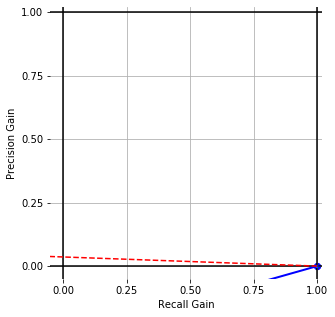

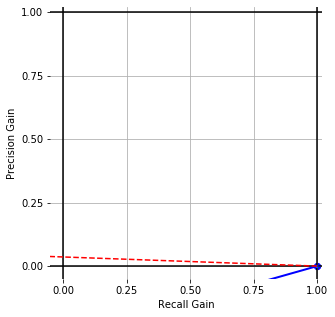

In [ ]:
prg.plot_prg(prg_curve)

## Compute the average precision score¶
Precision is a metric that quantifies the number of correct positive predictions made.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

In [ ]:
average_precision = average_precision_score(y_test, y_score)
auc_score = auc(recall, precision)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('Precision-Recall AUC: %.3f' % auc_score)

Average precision-recall score: 0.31
Precision-Recall AUC: 0.310


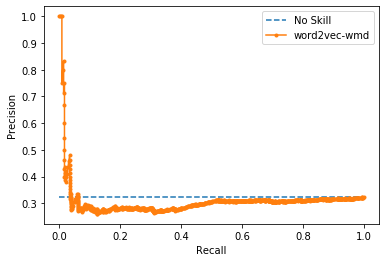

In [ ]:
%matplotlib inline
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill') #reference curve
precision, recall, _ = precision_recall_curve(y_test, y_score) #compute precision-recall curve
plt.plot(recall, precision, marker='.', label='word2vec-wmd') #plot model curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend() #show the legend
plt.show() #show the plot

## Compute ROC Curve
An ROC curve (or receiver operating characteristic curve) is a plot that summarizes the performance of a binary classification model on the positive class [(see Blog)](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/).

Use ROC when both classes detection is equally important — When we want to give equal weight to both classes prediction ability we should look at the ROC curve [link](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba).

In [ ]:
roc_auc = roc_auc_score(y_test, y_score)
print('ROC AUC %.3f' % roc_auc)

ROC AUC 0.458


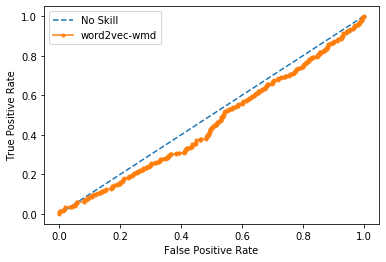

In [ ]:
%matplotlib inline
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill') #reference curve
fpr, tpr, _ = roc_curve(y_test, y_score) #compute roc curve
plt.plot(fpr, tpr, marker='.', label='word2vec-wmd') #plot model curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() #show the legend
plt.show() #show the plot

## Compute distribution of similarities

In [ ]:
#Basic Statistics
filter_wmd.describe()

,WMD,Linked?,SimWMD
count,1092.000000,1092.000000,1092.000000
mean,0.415888,0.322344,0.709248
std,0.092413,0.467588,0.045797
min,0.214654,0.000000,0.591856
25%,0.347343,0.000000,0.674507
50%,0.405725,0.000000,0.711376
75%,0.482564,1.000000,0.742202
max,0.689601,1.000000,0.823280


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6b49cc50>,
      dtype=object)

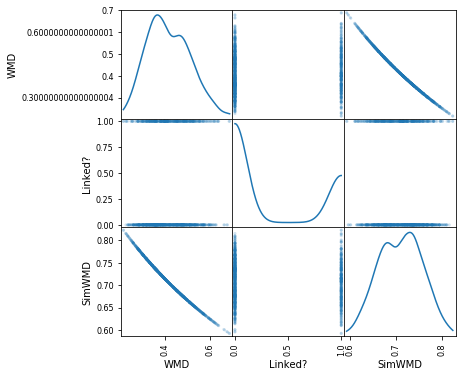

In [ ]:
scatter_matrix(filter_wmd, alpha=0.2, figsize=(6, 6), diagonal='kde')

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. The lag argument may be passed, and when lag=1 the plot is essentially data[:-1] vs. data[1:].

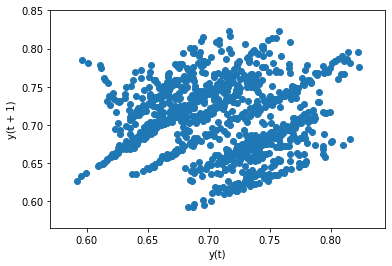

In [ ]:
lag_plot(filter_wmd[['SimWMD']])

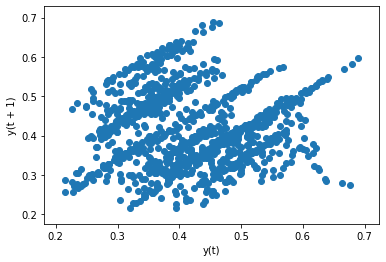

In [ ]:
lag_plot(filter_wmd['WMD'])

In [ ]:
# calculate model precision-recall curve
sim = np.array(filter_wmd['SimWMD'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6b60e898>,
      dtype=object)

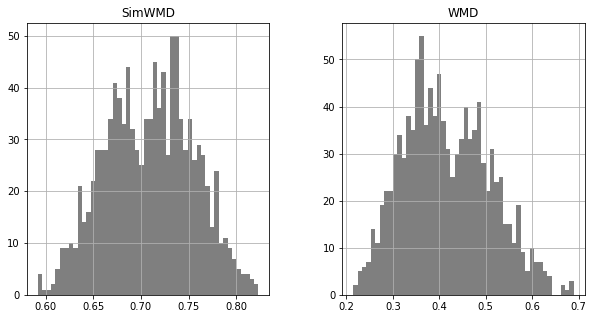

In [ ]:
filter_wmd.hist(column=['SimWMD','WMD'],color='k',bins=50,figsize=[10,5],alpha=0.5)

WMD       0.092413
SimWMD    0.045797
dtype: float64


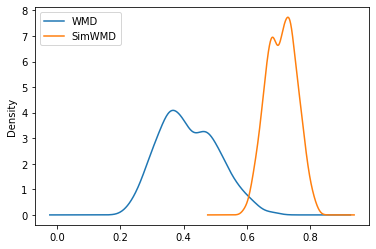

In [ ]:
errors = filter_wmd[['WMD','SimWMD']].std()
print(errors)
filter_wmd[['WMD','SimWMD']].plot.kde()

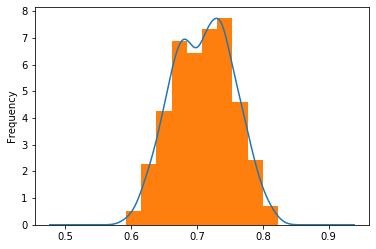

In [ ]:
filter_wmd['SimWMD'].plot.kde()
filter_wmd['SimWMD'].plot.hist(density=True) # Histogram will now be normalized

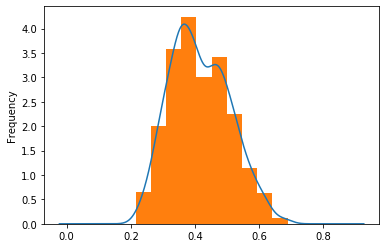

In [ ]:
filter_wmd['WMD'].plot.kde()
filter_wmd['WMD'].plot.hist(density=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6d5529b0>,
      dtype=object)

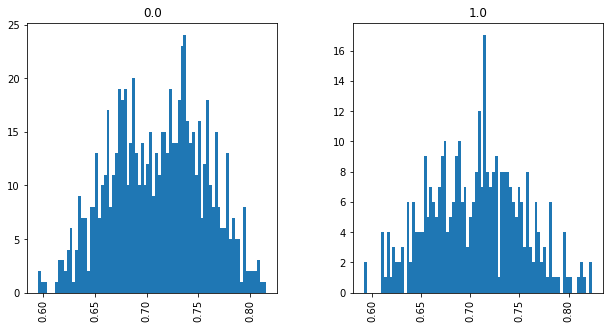

In [ ]:
filter_wmd.hist(by='Linked?',column='SimWMD',figsize=[10, 5],bins=80)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf6d5e69e8>,
      dtype=object)

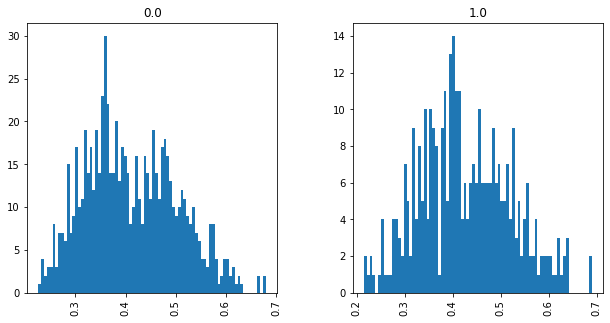

In [ ]:
filter_wmd.hist(by='Linked?',column='WMD',figsize=[10, 5],bins=80)

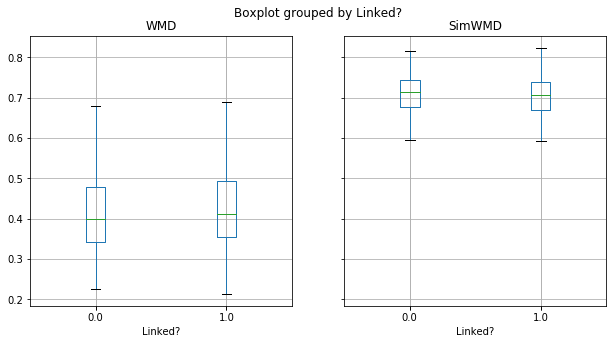

In [ ]:
boxplot = filter_wmd.boxplot(by='Linked?',column=['WMD', 'SimWMD'],figsize=[10, 5])

# Artifacts Proximity Visualization

Try to reproduce the same empirical evaluation like here: [link](https://arxiv.org/pdf/1507.07998.pdf). Pay attention to:
- Accuracy vs. Dimensionality (we can replace accuracy for false positive rate or true positive rate)
- Visualize paragraph vectors using t-sne

In [ ]:
doc2vec_model = gensim.models.Doc2Vec.load("test_data/models/doc2vec_libest.model")

2020-05-04 21:58:20,165 : INFO : loading Doc2Vec object from test_data/models/doc2vec_libest.model
2020-05-04 21:58:20,385 : INFO : loading vocabulary recursively from test_data/models/doc2vec_libest.model.vocabulary.* with mmap=None
2020-05-04 21:58:20,386 : INFO : loading trainables recursively from test_data/models/doc2vec_libest.model.trainables.* with mmap=None
2020-05-04 21:58:20,387 : INFO : loading wv recursively from test_data/models/doc2vec_libest.model.wv.* with mmap=None
2020-05-04 21:58:20,388 : INFO : loading docvecs recursively from test_data/models/doc2vec_libest.model.docvecs.* with mmap=None
2020-05-04 21:58:20,389 : INFO : loaded test_data/models/doc2vec_libest.model


In [ ]:
s = m.floor(len(texts)*0.1)
test_corpus = [i[1] for i in enumerate(texts[:s])]
train_corpus = [gensim.models.doc2vec.TaggedDocument(i[1], [i[0]]) for i in enumerate(texts[s:])]

In [ ]:
inferred_vector_1 = doc2vec_model.infer_vector(train_corpus[1].words,steps=200)
inferred_vector_2 = doc2vec_model.infer_vector(train_corpus[2].words,steps=200)

In [ ]:
inferred_vector_1 = inferred_vector_1.reshape(1, -1)
inferred_vector_2 = inferred_vector_2.reshape(1, -1)

In [ ]:
inferred_vector_2

array([  0.7421623 ,  -1.6610512 ,  -0.27062893,   1.2253095 ,
         0.6204487 ,   3.9395065 ,  -8.475632  ,  -2.5868661 ,
        -3.4885607 ,   4.3554783 ,   2.9360406 ,   1.5558928 ,
        -1.9676276 ,   1.1659459 ,  -0.9890286 ,  -4.347019  ,
        -4.6831775 ,  -1.5313215 ,   1.2421937 ,   1.9598829 ,
        -5.0745635 ,  -2.4384894 ,   0.60278225,   0.02906518,
         2.0064855 ,  -5.0548162 ,  -1.3854911 ,   0.02284797,
        -2.6165545 ,  -5.3791456 ,  -4.462908  ,   3.3332286 ,
        -1.1366688 ,  -3.265343  ,   3.7434504 ,   0.79451007,
        -1.5223789 ,   3.2920547 ,   6.55013   ,  -4.9374876 ,
       -10.74753   ,   4.9202447 ,   2.0541866 ,  -9.0258875 ,
         0.78840333,   4.737374  ,   2.6370018 ,  -1.6011399 ,
         4.027021  ,   8.9440155 ], dtype=float32)

In [ ]:
cosine_similarity = cosine_similarity(inferred_vector_1, inferred_vector_2)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
cosine_similarity

array([[0.65874046]], dtype=float32)

## Combining Doc2vec and Word2vec
Please check this post for futher detatils [link](https://stats.stackexchange.com/questions/217614/intepreting-doc2vec-cosine-similarity-between-doc-vectors-and-word-vectors)

In [ ]:
! nbdev_build_docs